This notebook plots ROIs from minian along with max and min projections to aid in tracking neurons across days and eventually cross-registering.  Much of this will be built into TraceFC and/or NeuroPy modules, but the backbone is here for easy visualiation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import os

if os.environ['SHELL'] == '/bin/zsh':
    sys.path.append('/Users/nkinsky/Documents/UM/GitHub/TraceFC/')
    sys.path.append('/Users/nkinsky/Documents/UM/GitHub/NeuroPy/')
elif os.environ['SHELL'] in ['/bin/bash', '/bin/sh']:
    sys.path.append('/data/GitHub/TraceFC/')
    sys.path.append('/data/GitHub/NeuroPy/')
%load_ext autoreload
%autoreload 2

from neuropy.plotting.ca_events import plot_pe_traces
from neuropy.io.minianio import MinianIO
import session_directory as sd
from neuropy.analyses.trace_fc import load_events_from_csv

/home/nkinsky/miniconda3/envs/NeuroPy/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## NRK todo:
Make below into a function that will work outside of TraceFC. Base function will plot ROIs on top of max proj. Another will plot min_proj. A third will combine them. Then you can loop through and plot for any set of sessions (all functions before now will go into NeuroPy) by either inputting a session directory OR using a lambda function to grab the sesh_dir from the animal name and session!  This last function could be implemented in TraceFC.

Keeping 44998 good frames found in "good_frames_bool.npy" file
Keeping 35589 good frames found in "good_frames_bool.npy" file
Eliminating timestamps from corrupted video0 in 15_57_51 folder.
Keeping 128405 good frames found in "good_frames_bool.npy" file
Eliminating timestamps from corrupted video0 in 12_44_15 folder.
Keeping 46637 good frames found in "good_frames_bool.npy" file
Eliminating timestamps from corrupted video0 in 12_41_24 folder.
Keeping 52828 good frames found in "good_frames_bool.npy" file
Keeping 47914 good frames found in "good_frames_bool.npy" file


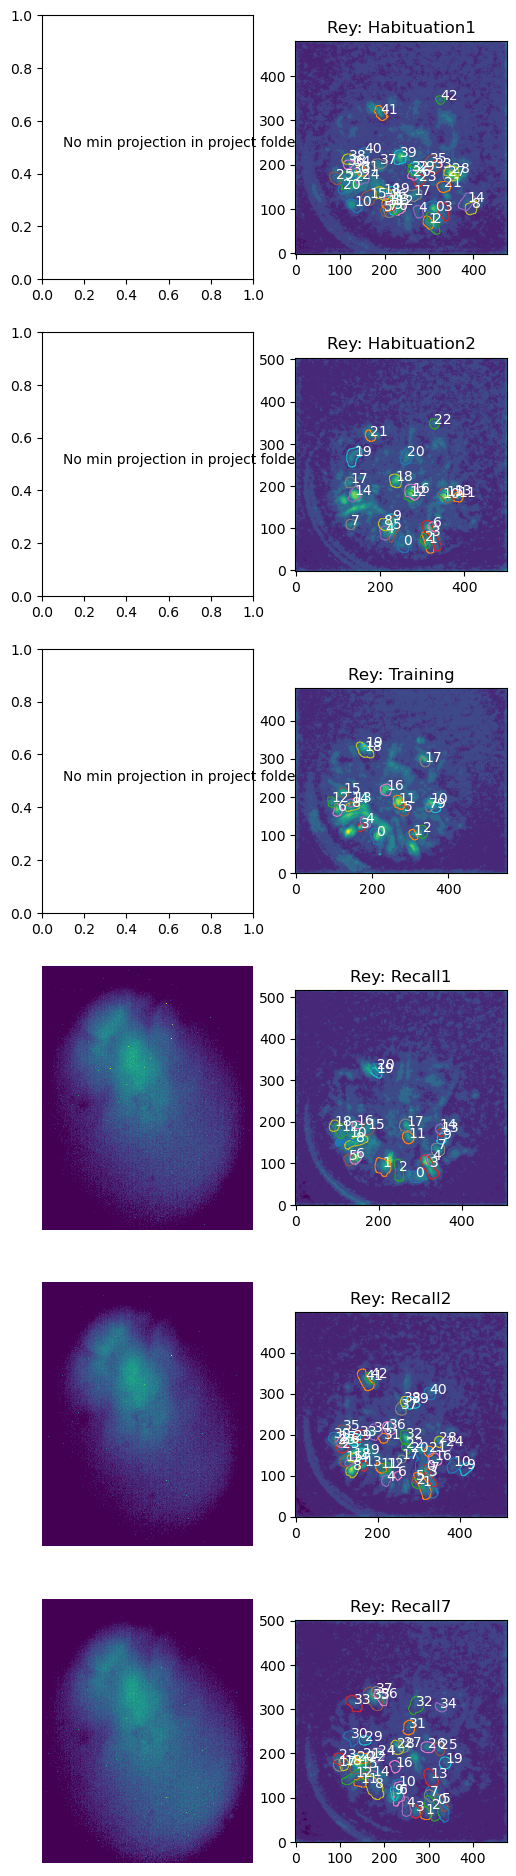

In [4]:
# NRK comment - best is to pop this out - inline plots look crappy
animal = 'Rey'
fig, ax = plt.subplots(6, 2, figsize=(6, 24))
for amin, amax, session in zip(ax.T[0], ax.T[1], ['Habituation1', 'Habituation2', 'Training', 
                                              'Recall1', 'Recall2', 'Recall7']):
    # Get session directory 
    sesh_dir = sd.get_session_dir(animal, session)

    # Load in ca imaging data from minian
    minian = MinianIO(basedir=sesh_dir)

    # Keep only good neurons
    caneurons = minian.trim_neurons(keep=['good', 'maybe_interneurons'])
    
    # load in max projection and min projection
    max_proj = np.load(sesh_dir / 'Miniscope_combined' / 'minian' / 'max_proj.npy')
    try:
        min_proj = np.load(sesh_dir / 'Miniscope_combined' / 'minian' / 'min_proj.npy')
    except FileNotFoundError:
        min_proj = False
    
    # Plot
    amax.imshow(max_proj)
    _, _, xe, ye = caneurons.plot_ROIs(label=True, ax=amax, plot_masks=False)
    amax.invert_yaxis()
    amax.set_title(f'{animal}: {session}')
    
    if isinstance(min_proj, np.ndarray):
        sns.heatmap(min_proj, ax=amin, cmap='viridis', vmin=60, vmax=140, cbar=False)
        amin.axis('off')
    else:
        amin.text(0.1, 0.5, 'No min projection in project folder')
  